### Import libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc
%matplotlib inline

### SQL Connection

In [4]:
# Had to increase timeout
connection = pyodbc.connect('Driver={SQL Server};'
'Server=LAPTOP-E8KMOCEO;'
'Database=Admisiones_DWH;'
'Trusted_Connection=yes;', timeout=5000)

## Part b

### Exercise i

In [9]:
df_examFaculty = pd.read_sql('select * from fact.examen e inner join dimension.carrera c on e.sk_carrera = c.sk_carrera', connection)
#df_examFaculty.head(5)

In [10]:
df_examFacultyCount = df_examFaculty.groupby('NombreFacultad').count()['ID_Examen'].reset_index(name='ExamCount')
df_examFacultyCount

,NombreFacultad,ExamCount
0,Arquitectura,9310
1,Ciencias Agricolas,3104
2,Ciencias Economicas,9266
3,Ciencias Politicas,9290
4,Ingenieria,9248
5,Medicina,9278


### Exercise ii

In [14]:
df_examGender = pd.read_sql('select * from fact.examen e inner join dimension.candidato c on e.sk_candidato = c.sk_candidato', connection)
#df_examGender.head(5)

In [15]:
df_examGenderCount = df_examGender.groupby('Genero').count()['ID_Examen'].reset_index(name='GenderCount')
df_examGenderCount

,Genero,GenderCount
0,F,24555
1,M,24941


### Exercise iii

In [17]:
df_examPrice = pd.read_sql('select * from fact.examen e inner join dimension.carrera c on e.sk_carrera = c.sk_carrera', connection)
#df_examPrice.head(5)

In [22]:
df_examPriceSum = df_examPrice.groupby('NombreCarrera').sum()['Precio'].reset_index(name='PriceSum')
df_examPriceSum

,NombreCarrera,PriceSum
0,Admin de Empresas,1460764.10
1,Agronomia,1472798.49
2,Arquitecrtura,1472209.41
3,Ciencias sociales,1470349.57
4,Contador Publico y Auditor,1469065.60
5,Derecho internacional,1476007.22
6,Diseno grafico,1476152.33
7,Diseno industrial,1472469.94
8,Enfermeria,1474101.49
9,Hoteleria,1471569.39


### Exercise iv

In [24]:
df_FacultyMean = pd.read_sql('select * from fact.examen e inner join dimension.carrera c on e.sk_carrera = c.sk_carrera', connection)
#df_FacultyMean.head(5)

In [38]:
df_TopFacultyMean = df_FacultyMean.groupby('NombreFacultad').mean()['NotaTotal'].reset_index(name='Score mean')
df_TopFacultyMean = df_TopFacultyMean.sort_values(by='Score mean', ascending=False)[0:2]
df_TopFacultyMean

,NombreFacultad,Score mean
3,Ciencias Politicas,75.329622
4,Ingenieria,75.295798


## Part c

### Exercise i

([<matplotlib.patches.Wedge at 0x2310bb59af0>,
 [Text(0.913470699505598, 0.6128387072833714, 'Arquitectura'),
  Text(0.2098381458110263, 1.0797999595122194, 'Ciencias Agricolas'),
  Text(-0.6149243505668454, 0.9120680035391788, 'Ciencias Economicas'),
  Text(-1.0780317930018875, -0.21874060728894396, 'Ciencias Politicas'),
  Text(-0.21203085933070062, -1.0793715369100136, 'Ingenieria'),
  Text(0.914713517691085, -0.6109821442179806, 'Medicina')],
 [Text(0.49825674518487156, 0.33427565851820257, '18.8%'),
  Text(0.11445717044237796, 0.5889817960975742, '6.3%'),
  Text(-0.33541328212737015, 0.4974916382940975, '18.7%'),
  Text(-0.588017341637393, -0.11931305852124215, '18.8%'),
  Text(-0.11565319599856397, -0.5887481110418256, '18.7%'),
  Text(0.49893464601331905, -0.33326298775526214, '18.7%')])

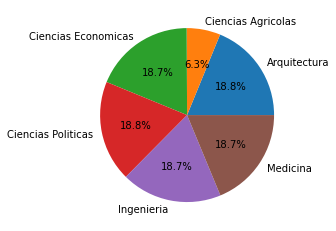

In [41]:
plt.pie(df_examFacultyCount['ExamCount'], labels=df_examFacultyCount.NombreFacultad, autopct='%1.1f%%')

### Exercise ii

### Exercise iii